In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

In [6]:
loss = np.loadtxt('./KflowNN/output.dat',unpack = True)

Text(0, 0.5, 'Loss')

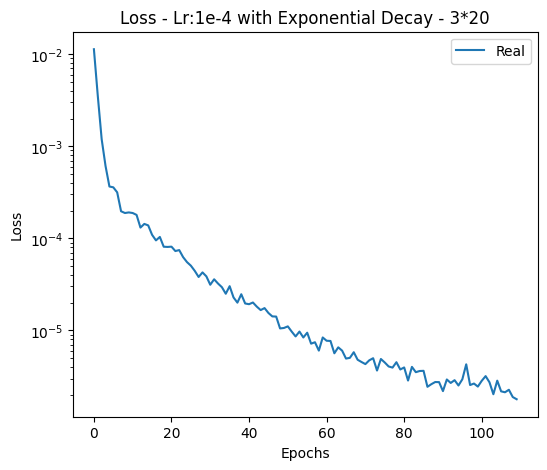

In [7]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.set_yscale('log')

# Surface Plot

ax.plot(loss[0],loss[1])

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("Loss - Lr:1e-4 with Exponential Decay - 3*20")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [8]:
x = np.load("./KflowNN/X",allow_pickle=True)
y = np.load("./KflowNN/Y",allow_pickle=True)

In [9]:
u = np.load("./KflowNN/U",allow_pickle=True)
v = np.load("./KflowNN/V",allow_pickle=True)

In [11]:
phi =np.load("./KflowNN/Phi",allow_pickle=True)
omega = np.load("./KflowNN/Omega",allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: './KflowNN/Phi'

In [12]:
u

array([[ 1.1086464e-04,  4.1839108e-04,  4.9918704e-04, ...,
        -7.0400722e-04, -3.0848384e-04,  1.1079474e-04],
       [ 3.3289194e-04,  5.7664327e-04,  5.8702193e-04, ...,
        -4.0017627e-04, -3.5975128e-05,  3.3294142e-04],
       [ 5.4132938e-04,  7.4186176e-04,  7.0779026e-04, ...,
        -1.3481081e-04,  2.0826142e-04,  5.4131926e-04],
       ...,
       [-2.0217896e-04,  2.6228745e-04,  5.2394532e-04, ...,
        -1.2267008e-03, -7.4565504e-04, -2.0224982e-04],
       [-7.7873468e-05,  3.0673668e-04,  4.7534332e-04, ...,
        -9.9435262e-04, -5.5810995e-04, -7.7913945e-05],
       [ 1.1083484e-04,  4.1834265e-04,  4.9923919e-04, ...,
        -7.0404261e-04, -3.0845776e-04,  1.1079474e-04]], dtype=float32)

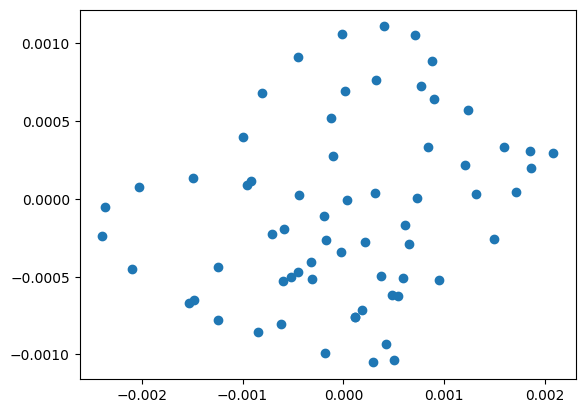

In [13]:
plt.scatter(u[0],v[0])

Text(0.5, 0, 'Z-Axis')

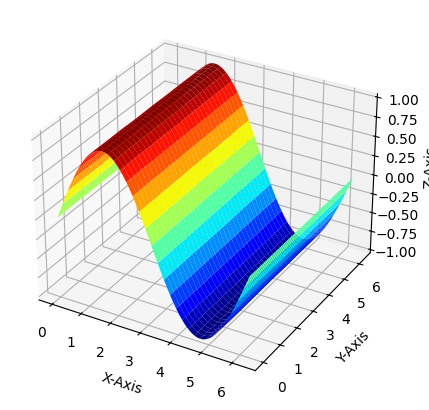

In [16]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

# Surface Plot

ax.plot_surface(x, y, v, cmap=cm.jet)

# Labels

ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')

NameError: name 'omega' is not defined

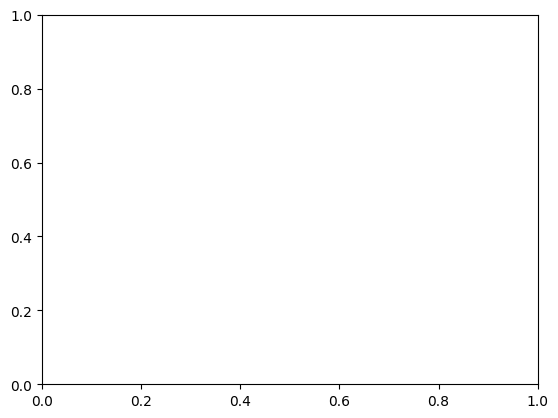

In [17]:
fig, ax = plt.subplots()


# Surface Plot

ax.pcolormesh(x, y, omega, cmap='RdBu')

# Labels



In [49]:
u_list = natsorted(glob.glob('./KflowNN/U*'))
v_list = natsorted(glob.glob('./KflowNN/V*'))

x_list = natsorted(glob.glob('./KflowNN/X*'))
y_list = natsorted(glob.glob('./KflowNN/Y*'))

phi_list = natsorted(glob.glob('./KflowNN/Phi*'))
omega_list = natsorted(glob.glob('./KflowNN/Omega*'))

In [50]:
phi_list[1]

'./KflowNN/Phi2'

/var/folders/8j/7mx8fh612vn6fnsw42p34gd40000gp/T/ipykernel_9871/2035295218.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,7), dpi=100)


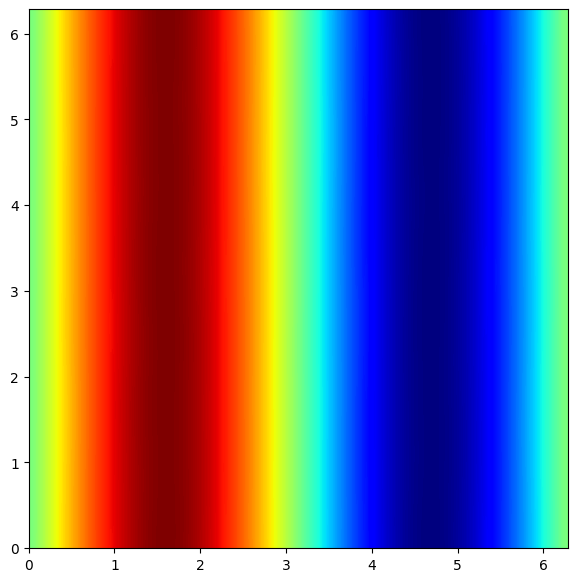

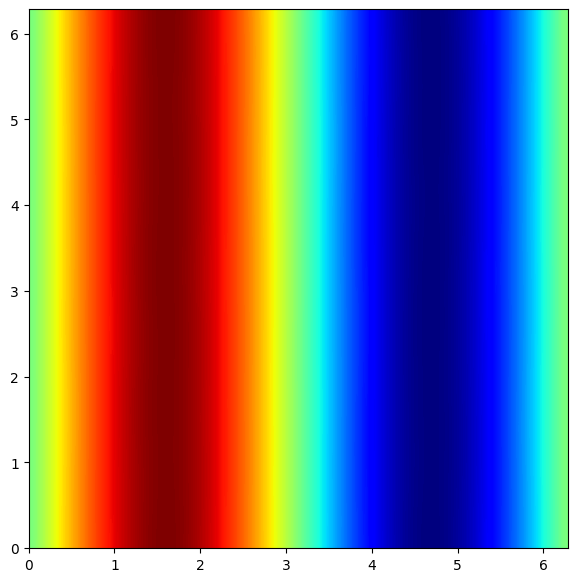

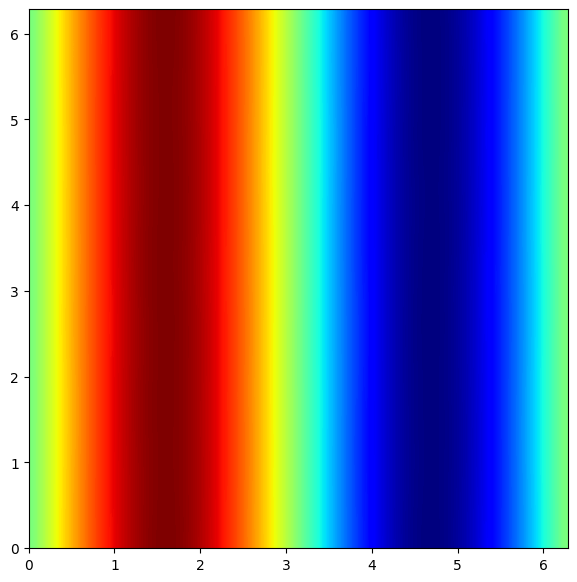

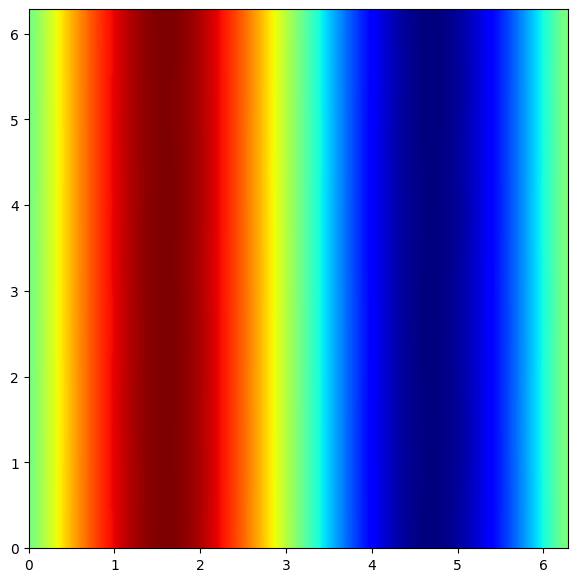

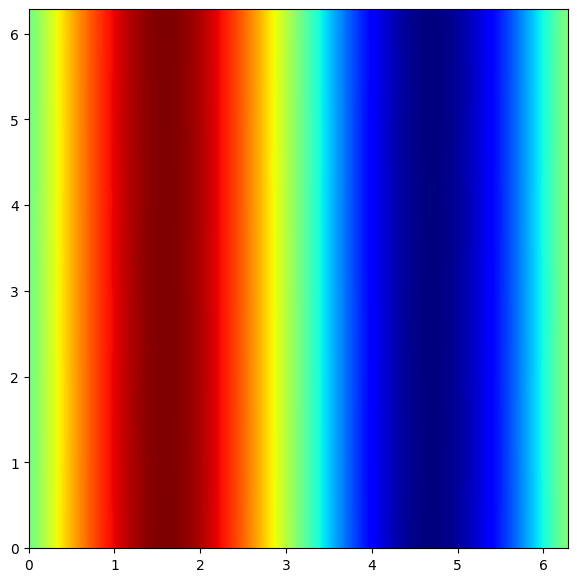

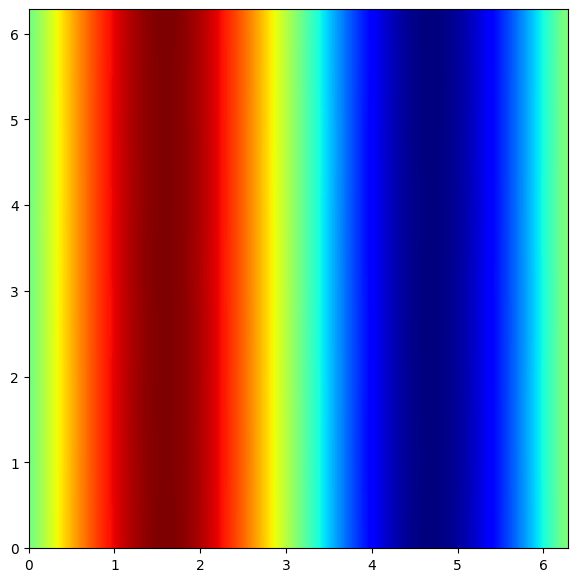

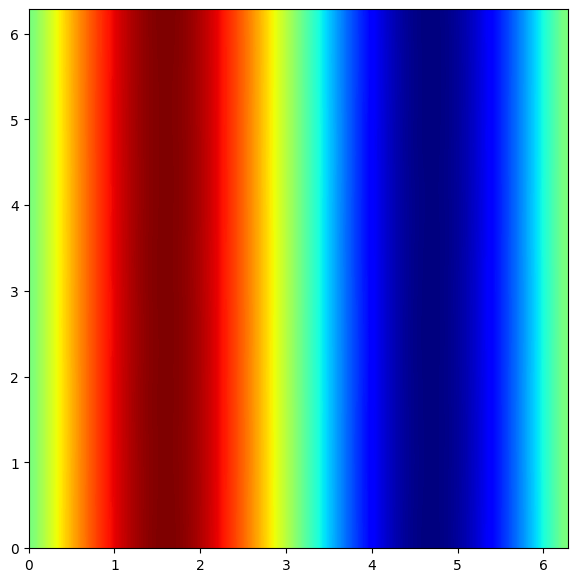

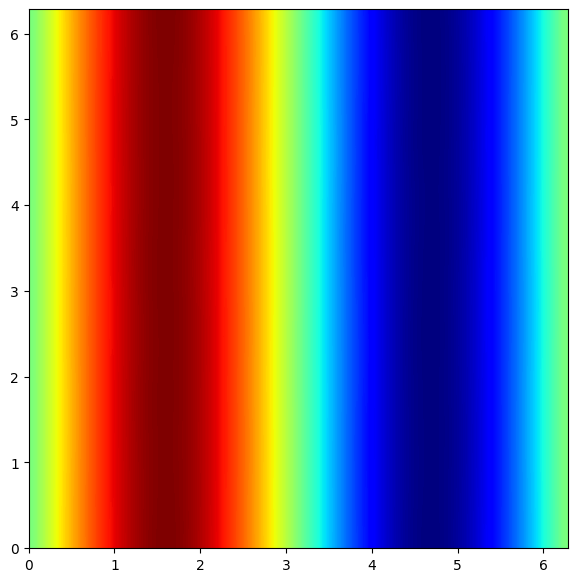

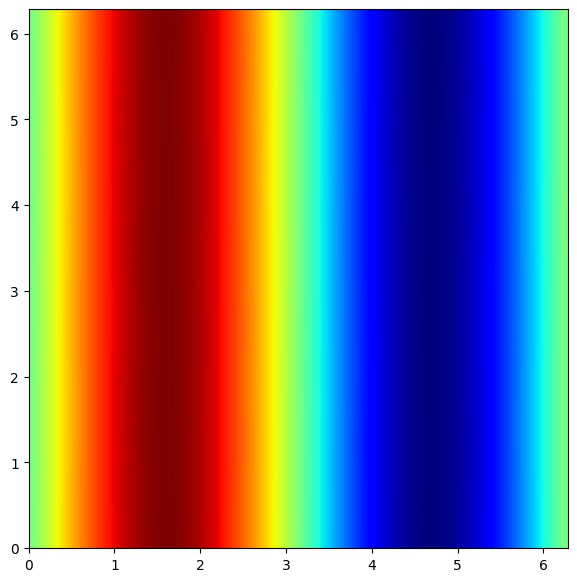

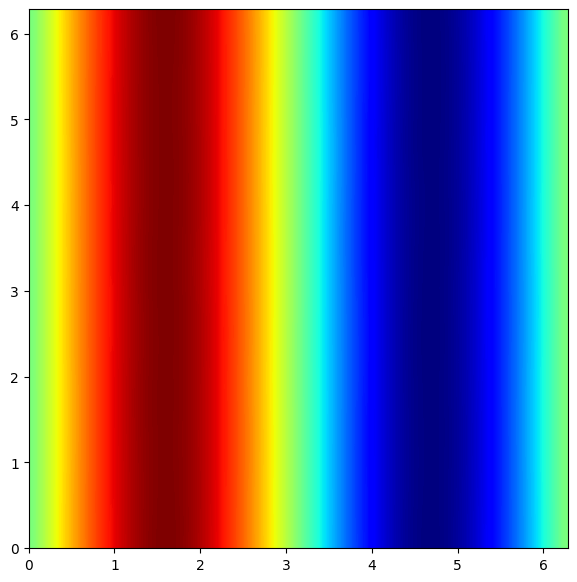

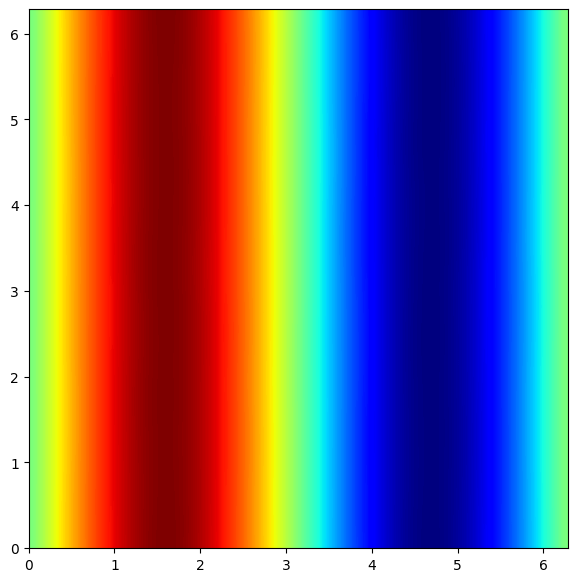

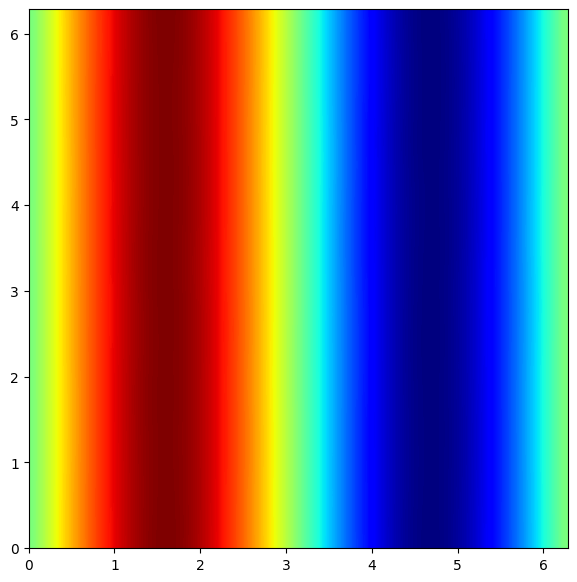

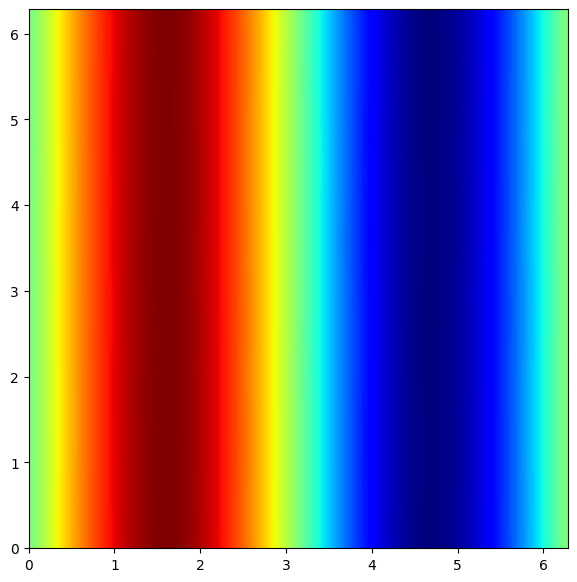

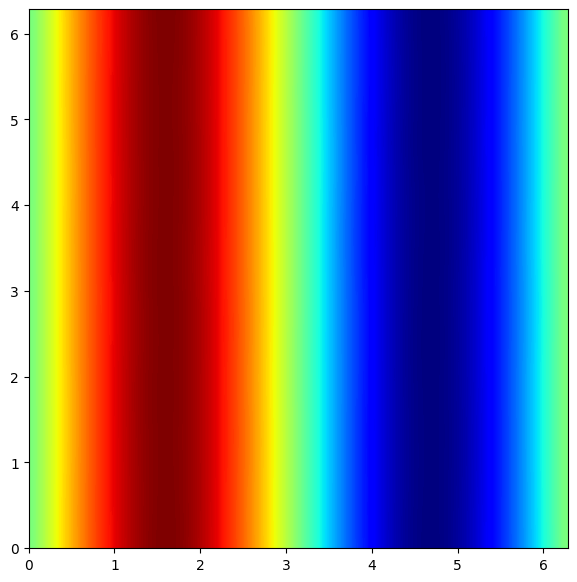

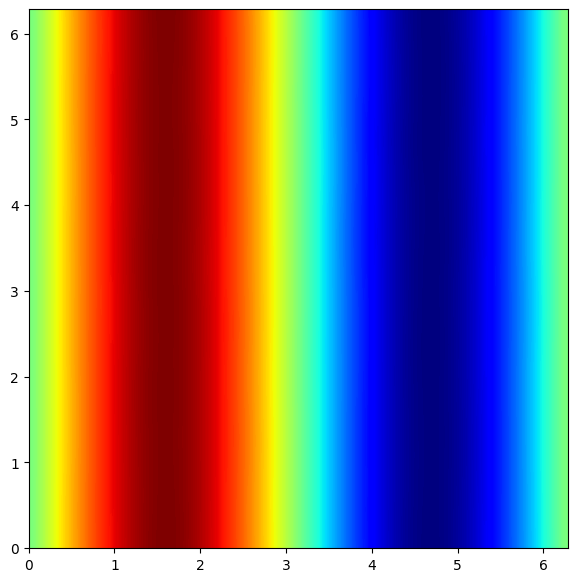

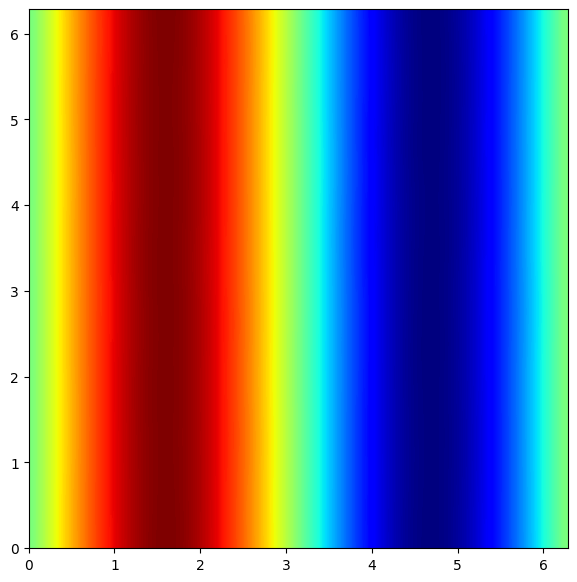

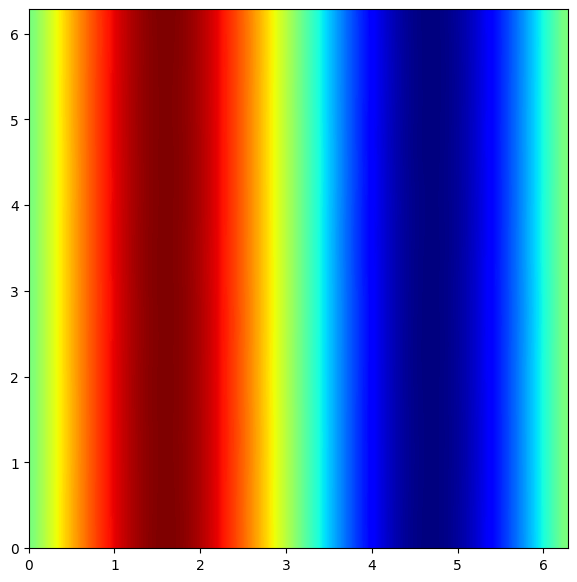

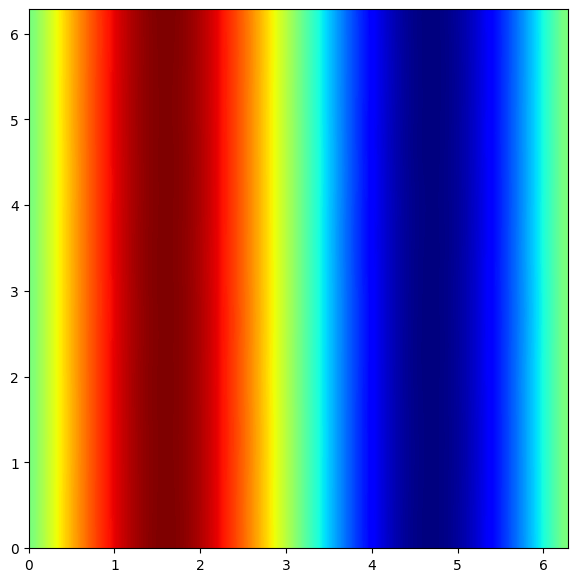

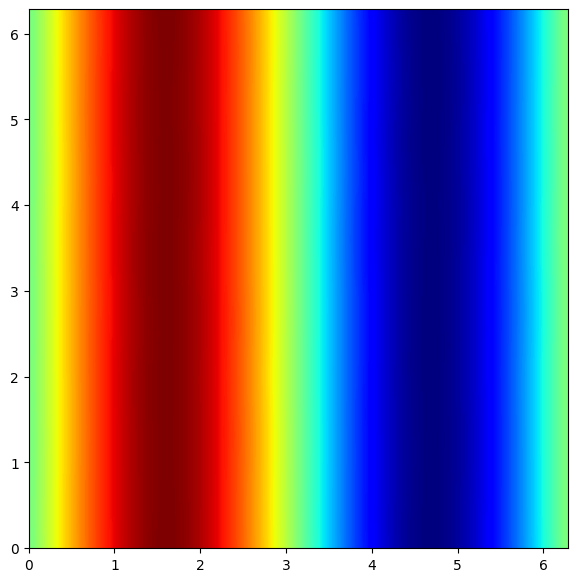

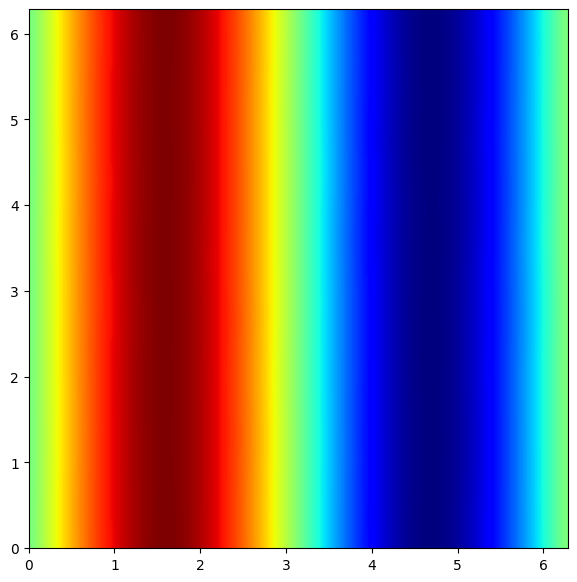

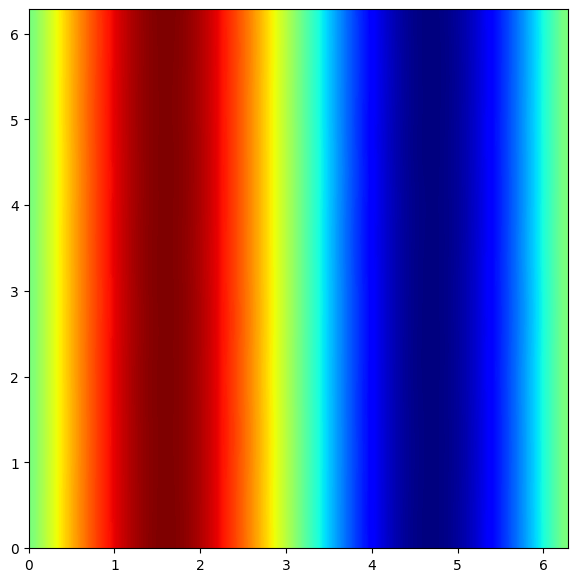

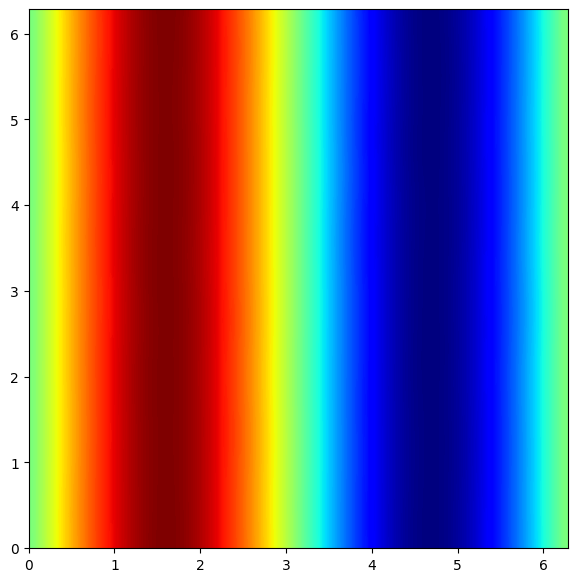

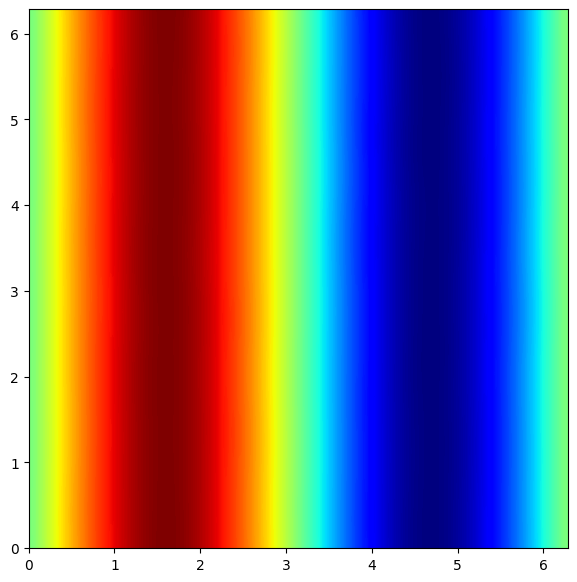

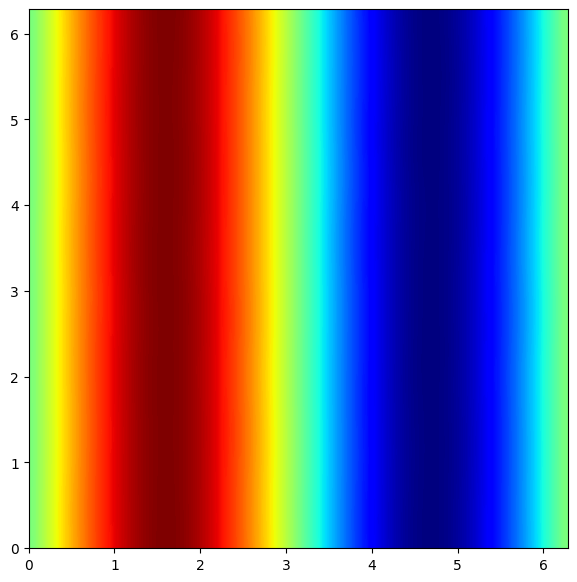

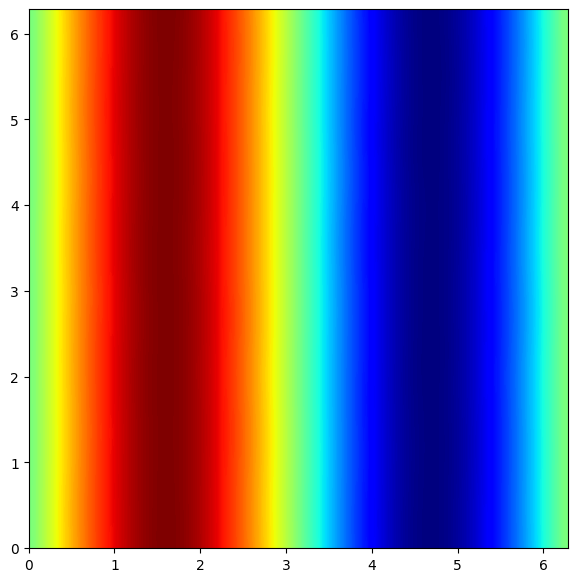

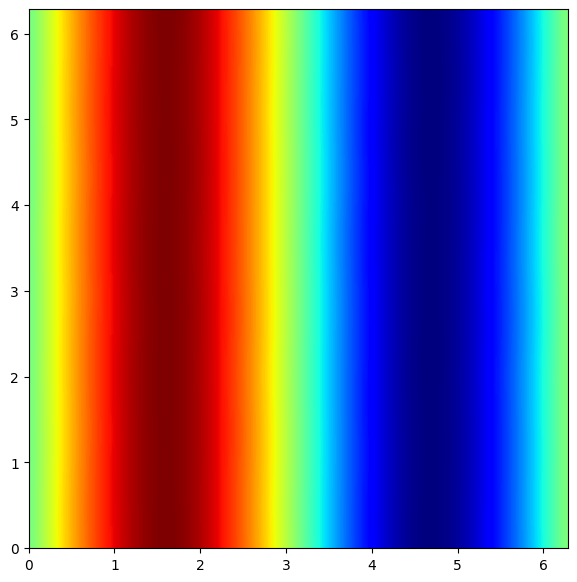

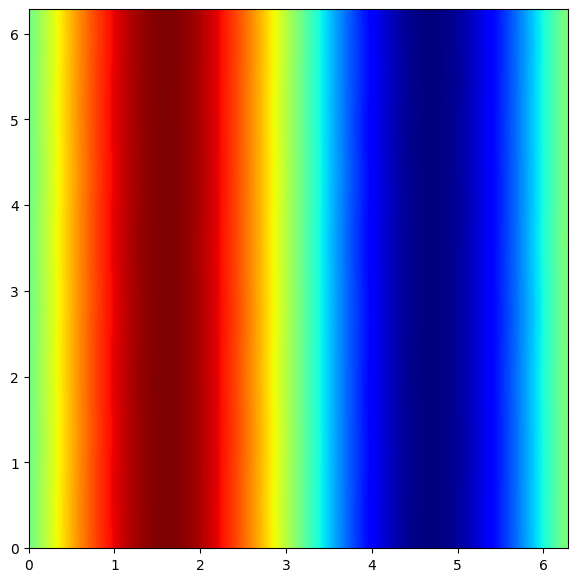

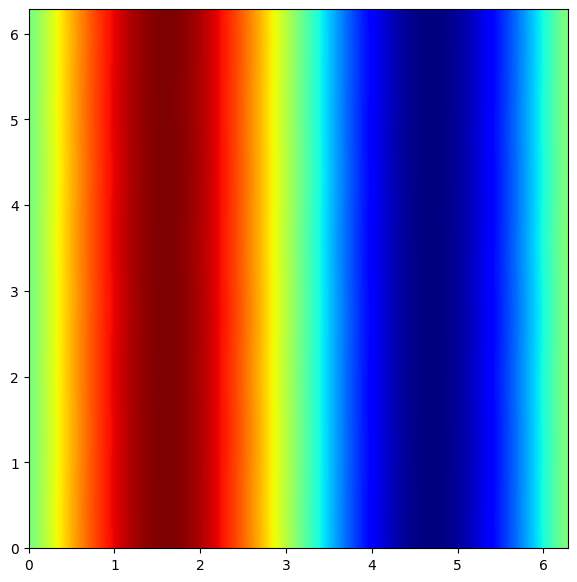

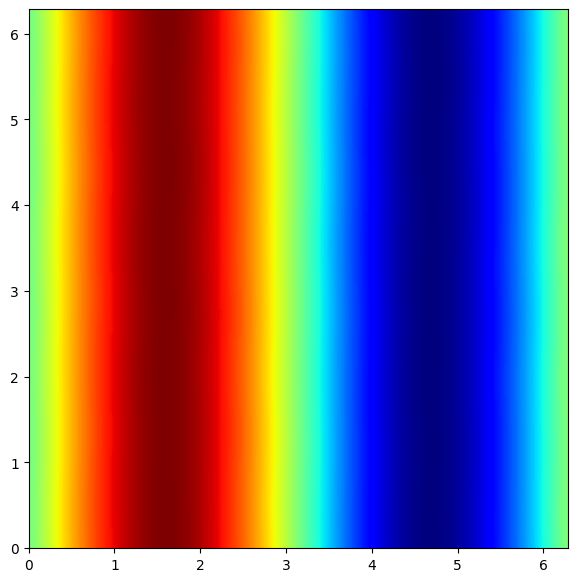

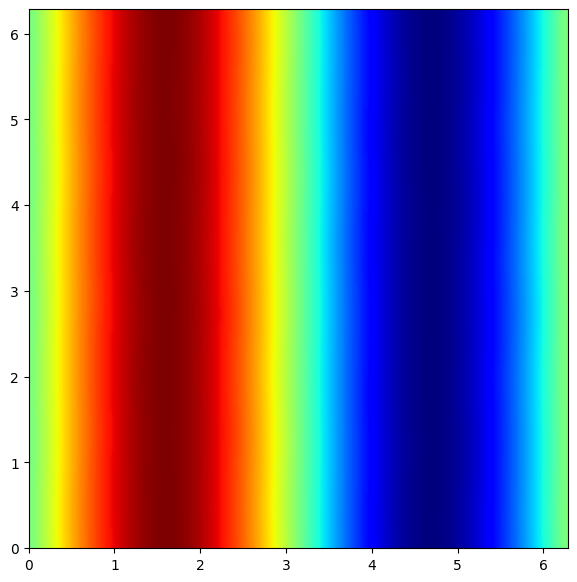

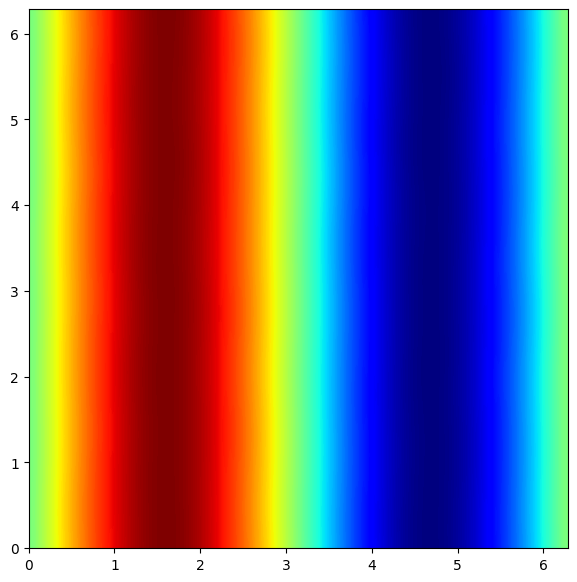

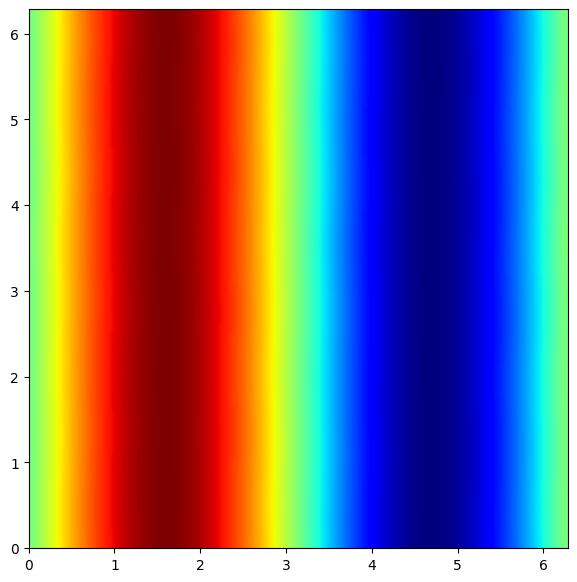

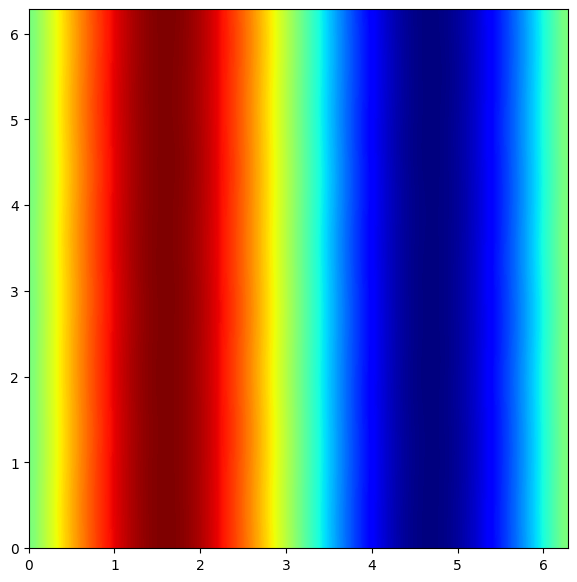

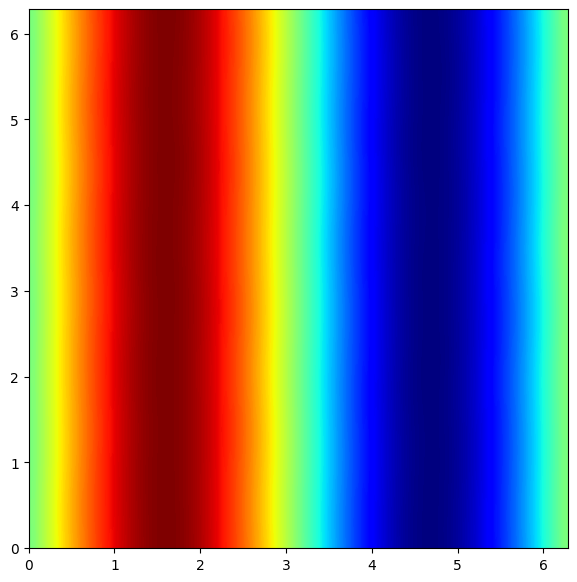

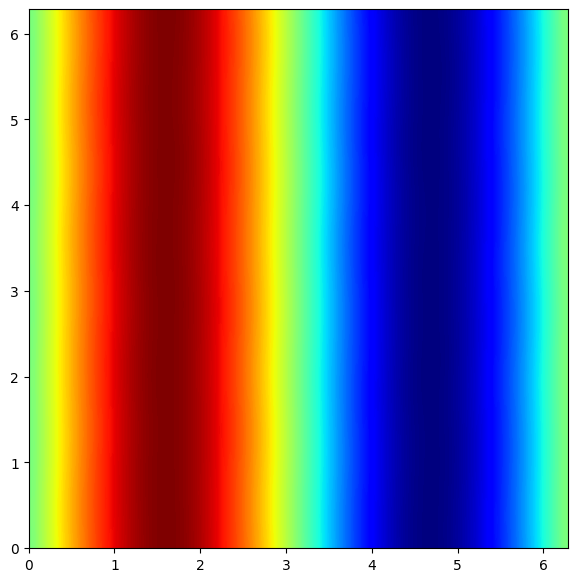

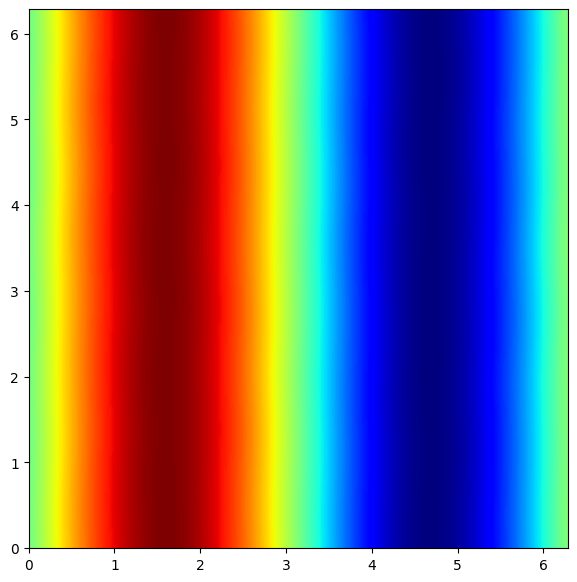

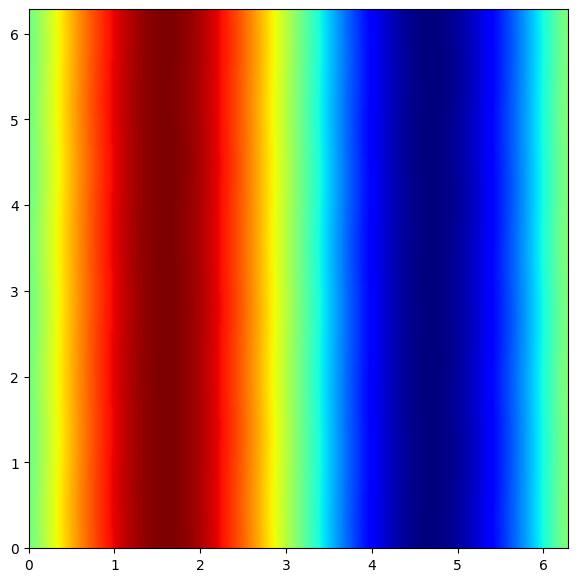

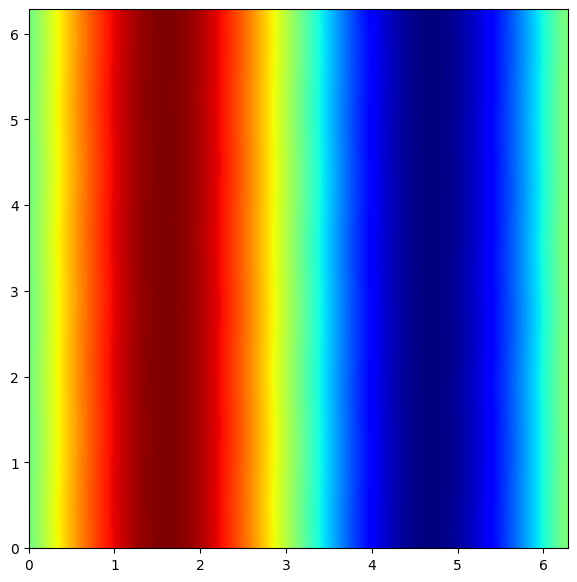

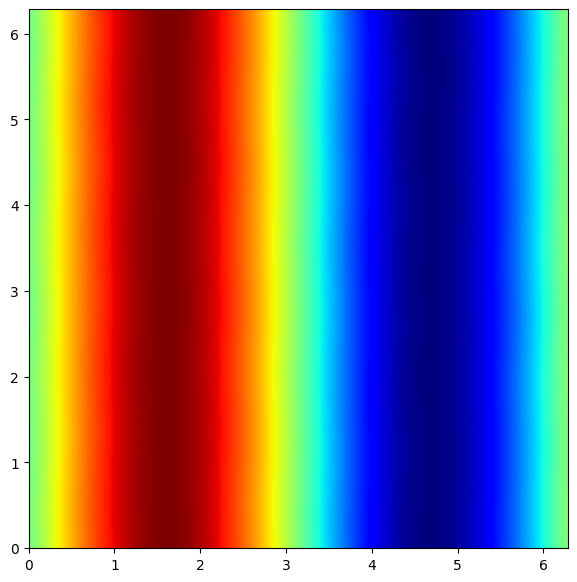

In [52]:
for i in range(1,len(u_list)):    
    x = np.load(x_list[i],allow_pickle=True)
    y = np.load(y_list[i],allow_pickle=True)
    u = np.load(u_list[i],allow_pickle=True)
    v = np.load(v_list[i],allow_pickle=True)

    x=np.unique(x)
    y=np.unique(y)
    X,Y = np.meshgrid(x,y)
    Z=v.reshape(len(x),len(y))
    Z=np.transpose(Z)
    data = Z


    plt.figure(figsize=(7,7), dpi=100)

    # Surface Plot

    plt.imshow( data , cmap = 'jet' , interpolation = 'gaussian' , origin='lower',\
           aspect='equal',  extent = [min(x), max(x), min(y), max(y)] )  
    # Labels

    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')
    ax.set_zlabel('Z-Axis')
    
    # Save
    #plt.savefig(f'omega_plot_{i}.png')
    #plt.cla()